<a href="https://colab.research.google.com/github/fadghom-22/deep_leaarning/blob/main/indonesianbatik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir /content/drive/MyDrive/Dataset
!cp kaggle.json /content/drive/MyDrive/Dataset/

In [2]:
import zipfile

In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile('drive/MyDrive/Dataset/DATASET.zip' , 'r') as zipObj:
  zipObj.extractall()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [6]:
from keras.optimizers.legacy.adadelta import Adadelta
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D,  BatchNormalization

In [7]:
from tqdm import notebook
from tqdm.notebook import tqdm as tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random as rn
import warnings
from plotly.subplots import make_subplots

sns.set_style('darkgrid')

import tensorflow as tf
import os
import fnmatch
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
Z=[]
IMG_SIZE=150
batik_bali_DIR='/content/DATASET/TRAIN/Batik Bali'
batik_betawi_DIR='/content/DATASET/TRAIN/Batik Betawi'
batik_cendrawasih_DIR='/content/DATASET/TRAIN/Batik Cendrawasih'
batik_lasem_DIR='/content/DATASET/TRAIN/Batik Lasem'
batik_poleng_DIR='/content/DATASET/TRAIN/Batik Poleng'

In [9]:
def assign_label(img,batik_type) :
  return batik_type

In [10]:
X=[]
def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):     
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

In [11]:
make_train_data('Batik Bali' , batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

70


In [12]:
make_train_data('Batik Betawi' , batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

140


In [13]:
make_train_data('Batik Cendrawasih' , batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

210


In [14]:
make_train_data('Batik Lasem' , batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

280


In [15]:
make_train_data('Batik Poleng' , batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

350


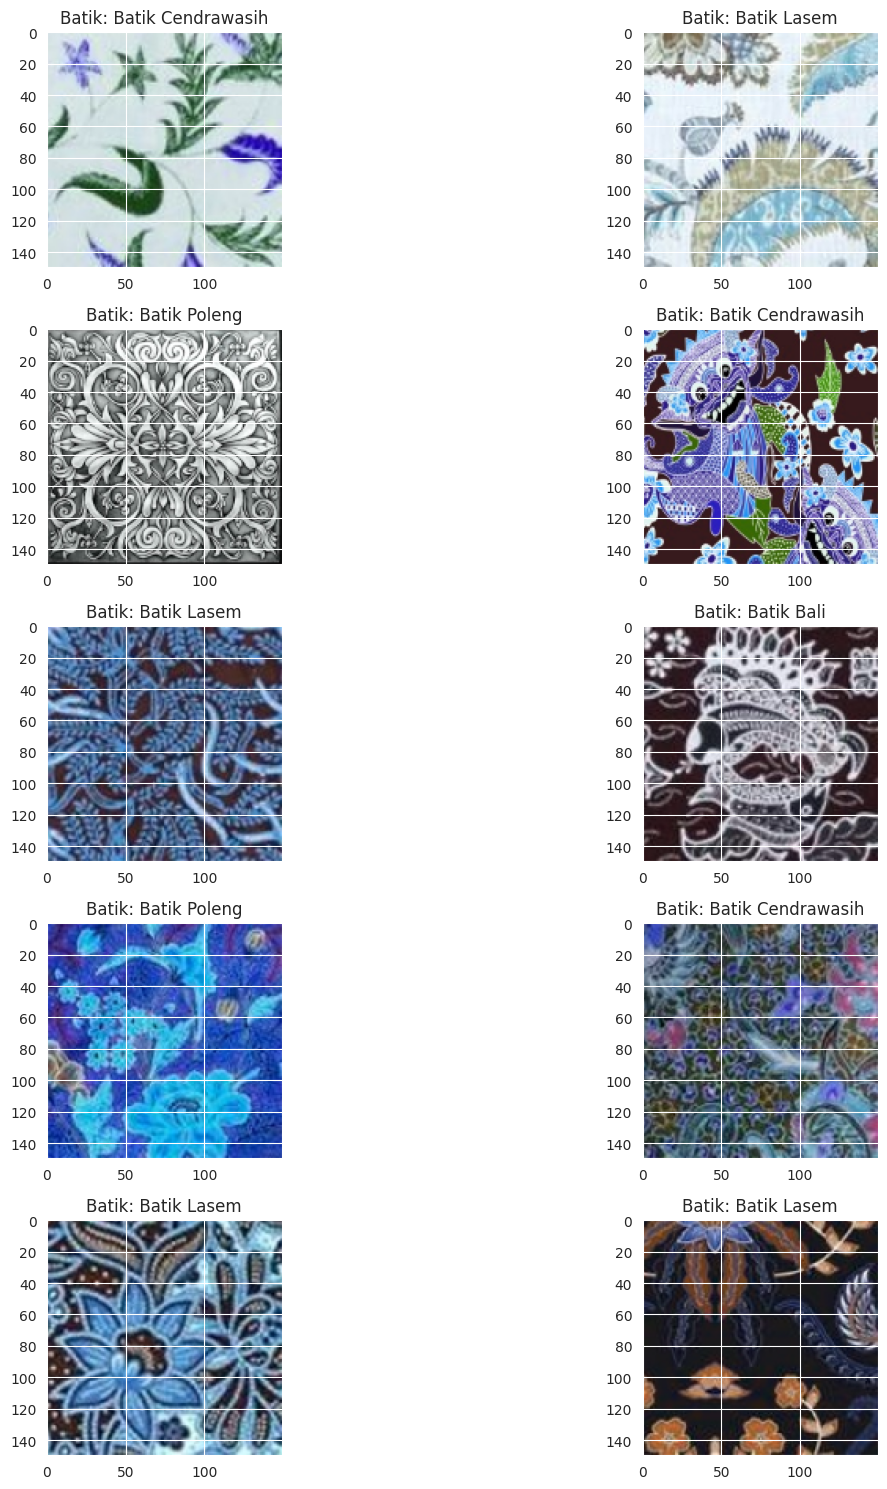

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [17]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)  #from keras.utils import to_categorical
X=np.array(X)
X=X/255

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [19]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [20]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [21]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [23]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [25]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

<ipython-input-25-d6c7731ea050>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/50
2/2 [==============================] - 15s 3s/step - loss: 1.6212 - accuracy: 0.2164 - val_loss: 1.6634 - val_accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - 20s 11s/step - loss: 1.6550 - accuracy: 0.1836 - val_loss: 1.6115 - val_accuracy: 0.1818
Epoch 3/50
2/2 [==============================] - 25s 15s/step - loss: 1.6111 - accuracy: 0.1836 - val_loss: 1.6284 - val_accuracy: 0.1932
Epoch 4/50
2/2 [==============================] - 22s 10s/step - loss: 1.6136 - accuracy: 0.1797 - val_loss: 1.6273 - val_accuracy: 0.1705
Epoch 5/50
2/2 [==============================] - 12s 2s/step - loss: 1.6133 - accuracy: 0.2164 - val_loss: 1.6178 - val_accuracy: 0.1705
Epoch 6/50
2/2 [==============================] - 12s 3s/step - loss: 1.6122 - accuracy: 0.1791 - val_loss: 1.6113 - val_accuracy: 0.2159
Epoch 7/50
2/2 [==============================] - 13s 3s/step - loss: 1.6106 - accuracy: 0.1716 - val_loss: 1.6070 - val_accuracy: 0.2386
Epoch 8/50
2/2 [===============

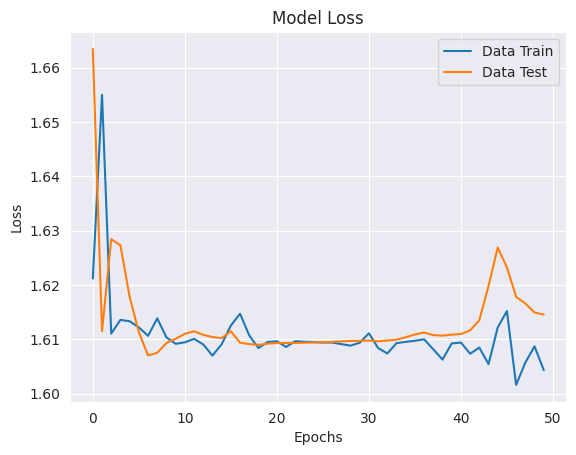

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Data Train' , 'Data Test'])
plt.show()

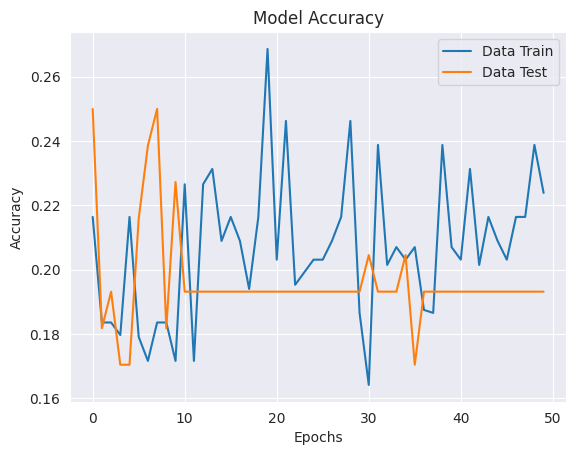

In [27]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Data Train' , 'Data Test'])
plt.show()

In [28]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

3/3 [==============================] - 1s 436ms/step


In [29]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

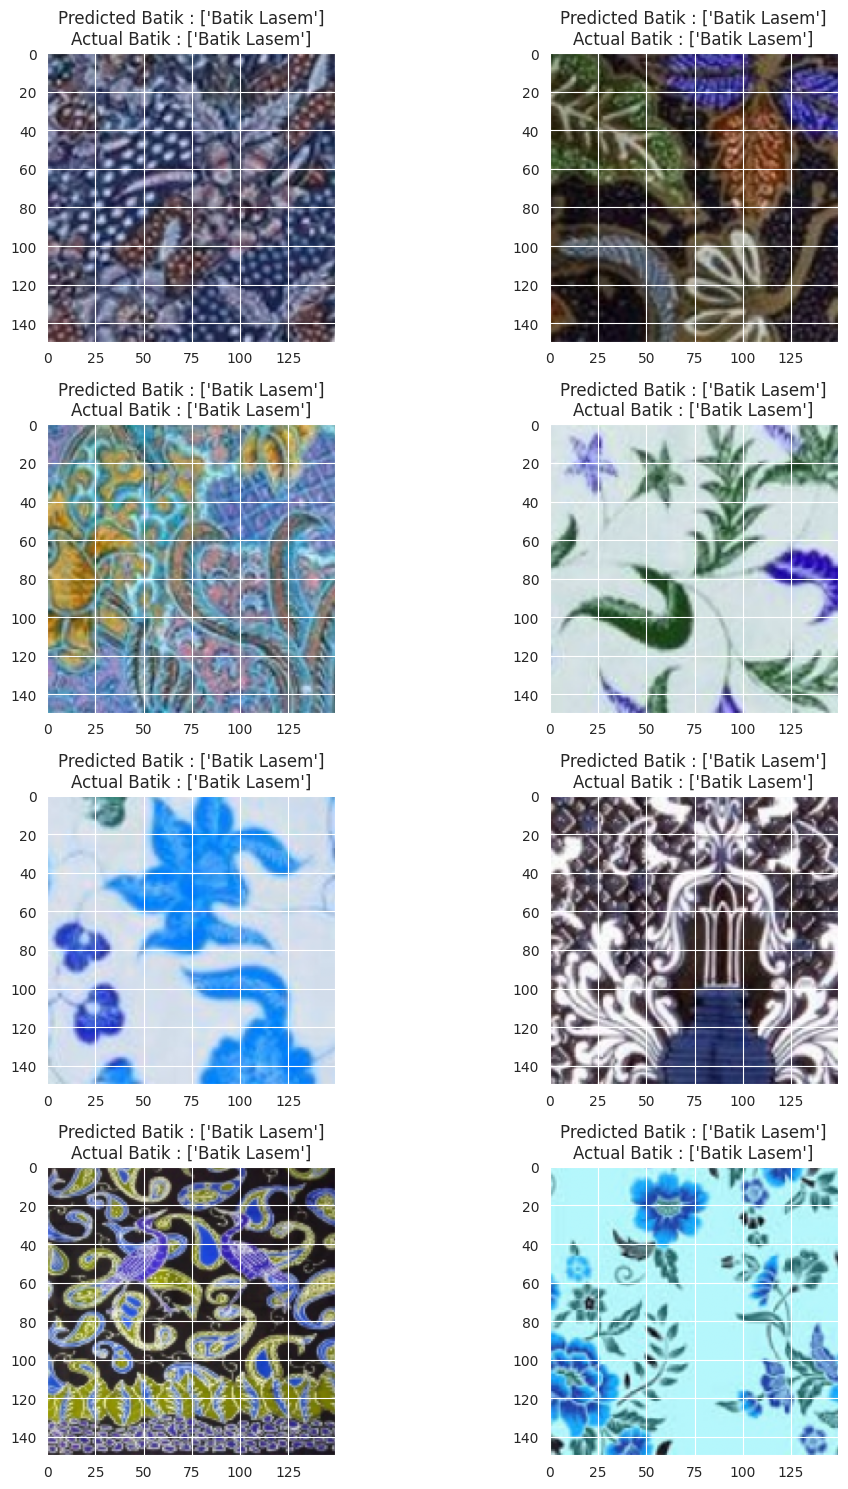

In [30]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

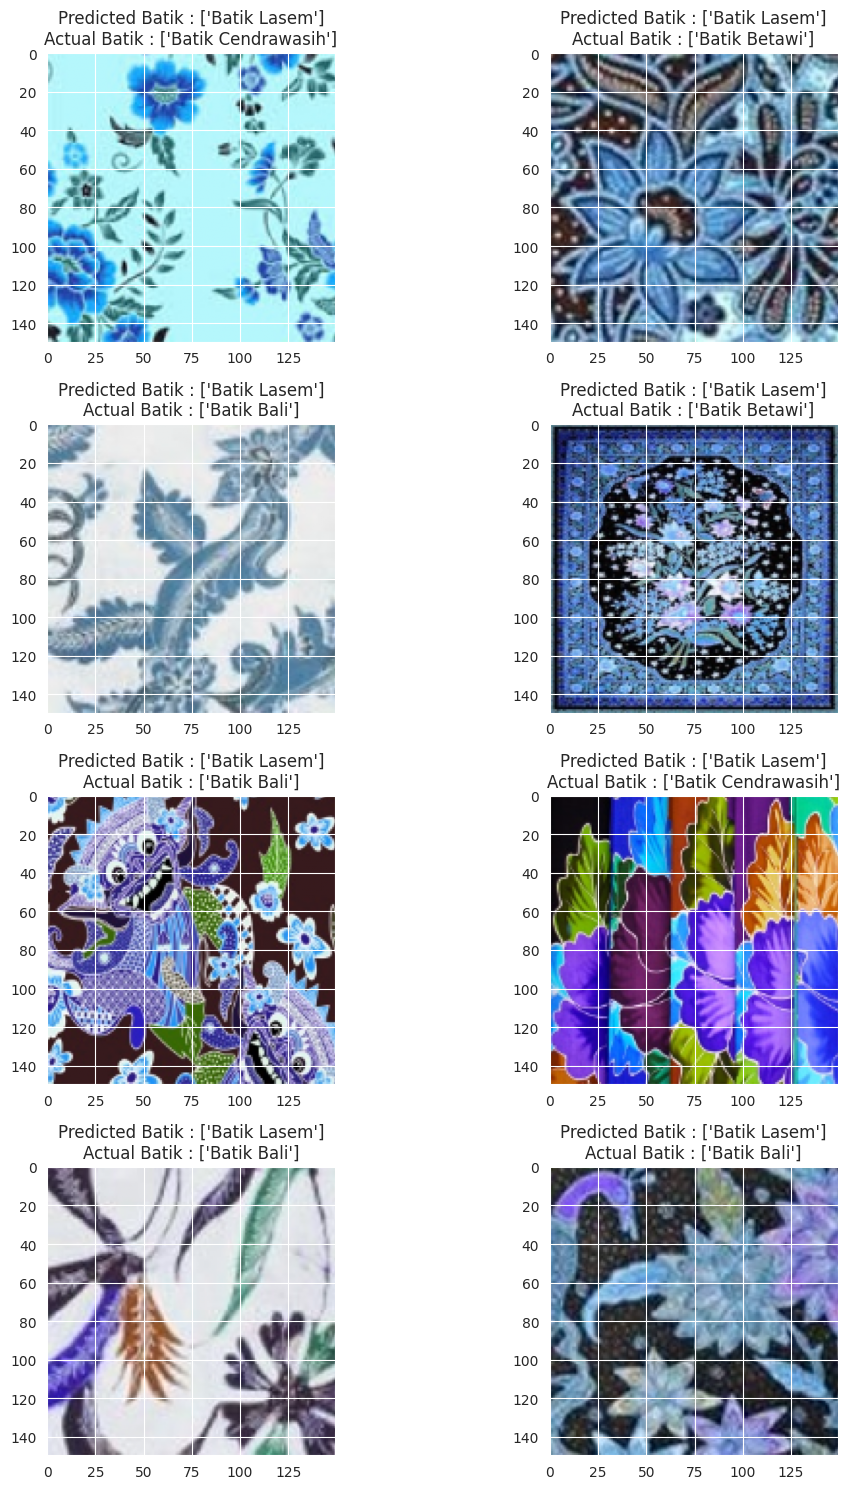

In [31]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[mis_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [32]:
tf.saved_model.save(model, '/kaggle/working/')

In [33]:
import tensorflow as tf


converter = tf.lite.TFLiteConverter.from_saved_model('/kaggle/working/') 
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [34]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))